# Selection_binary_classification
- 음성 데이터에 대한 분류된 감정이 저장된 csv를 활용하여 지도학습을 진행
- 성능이 좋은 모델을 선정

## 필수 라이브러리 import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 데이터 준비

un-natural-daliy : 일상생활 음성의 감정 예측

In [6]:
labeled_0_daily_df = pd.read_csv("./data/emotion_labeled_0_neutral_ETRI.csv", index_col=0)
labeled_0_daily_df = labeled_0_daily_df.iloc[:354, :]
labeled_0_daily_df

,label,file_name,angry,disgust,fear,happy,neutral,sad,surprise
0,0.0,Sess01_script01_User001F_001.wav,0.108658,0.123759,0.163147,0.077577,0.355532,0.090270,0.081057
1,0.0,Sess01_script01_User001F_002.wav,0.092113,0.130429,0.216745,0.063603,0.325484,0.094164,0.077462
2,0.0,Sess01_script01_User001F_003.wav,0.041212,0.092273,0.130359,0.033353,0.594373,0.059997,0.048433
3,0.0,Sess01_script01_User001F_005.wav,0.072157,0.108847,0.246469,0.051413,0.412226,0.056471,0.052418
4,0.0,Sess01_script01_User001F_006.wav,0.114871,0.192869,0.152400,0.091673,0.169726,0.177319,0.101141
...,...,...,...,...,...,...,...,...,...
349,0.0,Sess02_script03_User003F_005.wav,0.080709,0.099881,0.082612,0.042239,0.594479,0.056768,0.043313
350,0.0,Sess02_script03_User003F_006.wav,0.045009,0.056467,0.106874,0.034434,0.667508,0.044637,0.045070
351,0.0,Sess02_script03_User003F_008.wav,0.064711,0.069545,0.145994,0.052508,0.550750,0.054847,0.061644
352,0.0,Sess02_script03_User003F_009.wav,0.073032,0.078349,0.356782,0.048808,0.338896,0.054034,0.050098


un-natural : 긴급상황 음성의 감정 예측

In [7]:
labeled_0_emer_df = pd.read_csv("./data/emotion_labeled_0_neutral_AIHub.csv", index_col=0)
labeled_0_emer_df

,label,file_name,angry,disgust,fear,happy,neutral,sad,surprise
0,0.0,1.강제추행(성범죄)_107943_label.wav,0.189842,0.114989,0.139371,0.110127,0.135098,0.150757,0.159816
1,0.0,1.강제추행(성범죄)_108220_label.wav,0.193379,0.239132,0.108758,0.105608,0.122311,0.091541,0.139271
2,0.0,1.강제추행(성범죄)_109497_label.wav,0.061982,0.482140,0.094375,0.095728,0.074729,0.068141,0.122906
3,0.0,1.강제추행(성범죄)_109636_label.wav,0.186349,0.175437,0.127058,0.136257,0.116044,0.112726,0.146130
4,0.0,1.강제추행(성범죄)_117375_label.wav,0.304999,0.121018,0.105573,0.102989,0.146496,0.126591,0.092332
...,...,...,...,...,...,...,...,...,...
318,0.0,4.폭력범죄_933010_label.wav,0.285854,0.146950,0.111302,0.113506,0.119206,0.123095,0.100086
319,0.0,4.폭력범죄_933177_label.wav,0.285912,0.156525,0.098372,0.127285,0.105158,0.134161,0.092587
320,0.0,4.폭력범죄_997271_label.wav,0.125216,0.222636,0.195443,0.094094,0.075627,0.171496,0.115489
321,0.0,4.폭력범죄_998919_label.wav,0.325107,0.113451,0.061425,0.122577,0.117296,0.096117,0.164025


natural : 긴급상황 음성의 감정 예측

In [8]:
labeled_1_emer_df = pd.read_csv("./data/emotion_labeled_1.csv", index_col=0)
labeled_1_emer_df

,label,file_name,angry,disgust,fear,happy,neutral,sad,surprise
0,1.0,1.강제추행(성범죄)_105144_label.wav,0.074369,0.302597,0.123152,0.112772,0.107445,0.077521,0.202143
1,1.0,1.강제추행(성범죄)_105154_label.wav,0.108430,0.175215,0.117529,0.105761,0.122957,0.146268,0.223840
2,1.0,1.강제추행(성범죄)_105604_label.wav,0.142622,0.211411,0.129594,0.121581,0.144514,0.102750,0.147528
3,1.0,1.강제추행(성범죄)_105697_label.wav,0.244427,0.163676,0.132963,0.118321,0.074618,0.065131,0.200865
4,1.0,1.강제추행(성범죄)_106166_label.wav,0.220723,0.174311,0.129975,0.082436,0.186963,0.090724,0.114868
...,...,...,...,...,...,...,...,...,...
672,1.0,4.폭력범죄_998945_label.wav,0.113359,0.212740,0.113303,0.157936,0.173878,0.115190,0.113594
673,1.0,4.폭력범죄_998976_label.wav,0.225782,0.098953,0.148766,0.112828,0.133054,0.143034,0.137584
674,1.0,4.폭력범죄_999601_label.wav,0.137947,0.191702,0.127052,0.109328,0.114891,0.107452,0.211628
675,1.0,4.폭력범죄_999687_label.wav,0.217828,0.100223,0.086434,0.250242,0.123422,0.104358,0.117491


In [9]:
#3가지 데이터프레임을 병합하여 labeled_df 생성
labeled_df = pd.concat([labeled_0_daily_df,labeled_0_emer_df, labeled_1_emer_df], axis=0)
labeled_df

,label,file_name,angry,disgust,fear,happy,neutral,sad,surprise
0,0.0,Sess01_script01_User001F_001.wav,0.108658,0.123759,0.163147,0.077577,0.355532,0.090270,0.081057
1,0.0,Sess01_script01_User001F_002.wav,0.092113,0.130429,0.216745,0.063603,0.325484,0.094164,0.077462
2,0.0,Sess01_script01_User001F_003.wav,0.041212,0.092273,0.130359,0.033353,0.594373,0.059997,0.048433
3,0.0,Sess01_script01_User001F_005.wav,0.072157,0.108847,0.246469,0.051413,0.412226,0.056471,0.052418
4,0.0,Sess01_script01_User001F_006.wav,0.114871,0.192869,0.152400,0.091673,0.169726,0.177319,0.101141
...,...,...,...,...,...,...,...,...,...
672,1.0,4.폭력범죄_998945_label.wav,0.113359,0.212740,0.113303,0.157936,0.173878,0.115190,0.113594
673,1.0,4.폭력범죄_998976_label.wav,0.225782,0.098953,0.148766,0.112828,0.133054,0.143034,0.137584
674,1.0,4.폭력범죄_999601_label.wav,0.137947,0.191702,0.127052,0.109328,0.114891,0.107452,0.211628
675,1.0,4.폭력범죄_999687_label.wav,0.217828,0.100223,0.086434,0.250242,0.123422,0.104358,0.117491


In [10]:
labeled_df["label"].value_counts()

0.0    677
1.0    677
Name: label, dtype: int64

In [11]:
#save csv (labeled)
labeled_df.to_csv('./data/labeled.csv')

#### X, y split

In [12]:
X= labeled_df.iloc[:,2:]
y = labeled_df.iloc[:,0]

print(X.shape, y.shape)

(1354, 7) (1354,)


#### train, test split

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023, stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1083, 7) (1083,)
(271, 7) (271,)


In [14]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

## 모델 학습
- 성능이 좋은 이진 분류 머신러닝 지도학습 모델 사용
- 준지도 학습의 기반이 될 이진분류 모델을 탐색

#### LinearRegression

In [15]:
from sklearn.linear_model import LinearRegression

lrmodel = LinearRegression()
lrmodel.fit(X_train, y_train)

LinearRegression()

#### RandomForest
- GridSearch를 통한 최적의 Hyperparameter 찾기
- 최고 성능의 parameter를 통한 모델 학습
    - n_estimators: 랜덤 포레스트에서 생성할 트리의 개수. 트리의 개수가 많을수록 모델의 복잡도가 증가하고, 훈련 시간도 증가. 높은 수준의 n_estimators는 더욱 정확한 예측을 할 수 있다.
    - max_depth: 트리의 최대 깊이. 이 값이 높을수록 모델의 복잡도가 증가하고, 훈련 시간도 증가. max_depth를 적절하게 설정하면 트리의 불필요한 가지치기를 방지하여 모델의 성능을 높일 수 있다. None으로 설정하면 모든 노드가 확장될 때까지 트리가 분기됨.
    - min_samples_split: 노드를 분할하기 위한 최소한의 샘플 수. 이 값이 높을수록 모델의 일반화 성능이 높아지지만, 모델의 유연성 저하.
    - min_samples_leaf: 리프 노드가 되기 위한 최소한의 샘플 수. 이 값이 높을수록 모델의 일반화 성능이 높아지지만, 모델의 유연성은 저하.
    - max_features: 각 노드에서 사용할 최대 feature의 수입니다. 이 값이 낮을수록 모델의 일반화 성능이 높아지지만, 모델의 유연성은 저하.

In [16]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV, train_test_split

# rf = RandomForestClassifier()
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }
# rf_grid = GridSearchCV(rf, param_grid, cv=5)
# rf_grid.fit(X_train, y_train)
# rf_best = rf_grid.best_estimator_
# print("Random Forest Best Score:", rf_grid.best_score_)
# print("Random Forest Best Params:", rf_grid.best_params_)

추후 semi-supervised learning 때 더 많은 데이터가 학습되므로 기본 parameter 설정

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier()
rfmodel.fit(X_train, y_train)

RandomForestClassifier()

#### XGBoost
- GridSearch를 통한 최적의 Hyperparameter 찾기
- 최고 성능의 parameter를 통한 모델 학습

In [18]:
# !pip install xgboost

In [19]:
# from xgboost import XGBClassifier
# xgb = XGBClassifier()
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 1],
#     'subsample': [0.5, 0.7, 1],
#     'colsample_bytree': [0.5, 0.7, 1]
# }
# xgb_grid = GridSearchCV(xgb, param_grid, cv=5)
# xgb_grid.fit(X_train, y_train)
# xgb_best = xgb_grid.best_estimator_
# print("XGBoost Best Score:", xgb_grid.best_score_)
# print("XGBoost Best Params:", xgb_grid.best_params_)

추후 semi-supervised learning 때 더 많은 데이터가 학습되므로 기본 parameter 설정

In [20]:
from xgboost import XGBClassifier
xgbmodel = XGBClassifier()
xgbmodel.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

## 예측

In [21]:
y_pred_lr = lrmodel.predict(X_test)
y_pred_lr = [1 if y_pred > 0.5 else 0 for y_pred in y_pred_lr]

y_pred_rf = rfmodel.predict(X_test)

y_pred_xgb = xgbmodel.predict(X_test)

## 평가

#### 각 모델의 4가지 평가 지표

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_score(y_test, y_pred):
    # 각각의 평가 지표 계산
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # 결과 출력
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1-score:", f1)

In [22]:
print("LinearRegression")
print_score(y_test, y_pred_lr)

LinearRegression
Accuracy: 0.7859778597785978
Precision: 0.7215909090909091
Recall: 0.9338235294117647
F1-score: 0.8141025641025642


In [23]:
print("RandomForest Classifier")
print_score(y_test, y_pred_rf)

RandomForest Classifier
Accuracy: 0.8191881918819188
Precision: 0.7843137254901961
Recall: 0.8823529411764706
F1-score: 0.8304498269896193


In [24]:
print("XGBoost Classifier")
print_score(y_test, y_pred_xgb)

XGBoost Classifier
Accuracy: 0.8044280442804428
Precision: 0.7785234899328859
Recall: 0.8529411764705882
F1-score: 0.8140350877192983


## 최종 모델 선정
- F1-score, accuracy, precision, recall 순으로 우선순위를 정함
- recall : 1(natural)이라고 예측한 것이 진짜 
- precision : 1(natural)이라고 판단한 것 중, 진짜 1(natural)일 확률
- 데이터 정제 라는 목적 상, 라벨은 0(un-natural)인데, 1(natural)이라고 잘못 판단하는 경우를 최소화 해야하기 때문에  두 지표 중에서는 precision에 우선순위를 둔다.
- 해당 우선순위는 데이터의 양, 특성에 따라 변화된다.

#### 모델 성능 비교 시각화

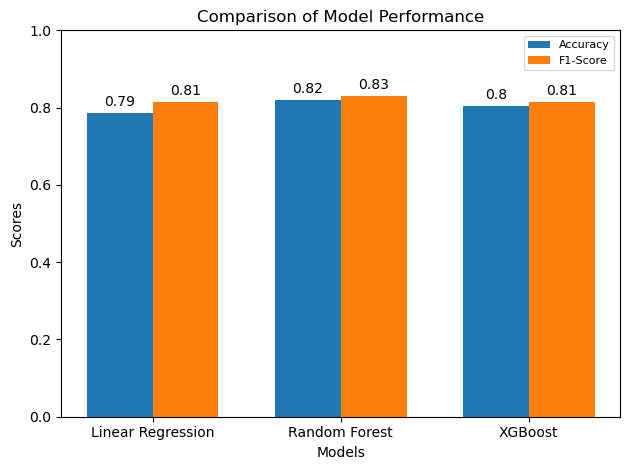

In [25]:
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

models = ["Linear Regression", "Random Forest", "XGBoost"]
y_preds = [y_pred_lr, y_pred_rf, y_pred_xgb]
acc_scores = [accuracy_score(y_test, y_pred) for y_pred in y_preds]
f1_scores = [f1_score(y_test, y_pred) for y_pred in y_preds]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, acc_scores, width, label='Accuracy')
rects2 = ax.bar(x + width/2, f1_scores, width, label='F1-Score')

ax.set_ylim([0, 1])
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(fontsize=8)
ax.set_title("Comparison of Model Performance")
ax.set_xlabel("Models")
ax.set_ylabel("Scores")

for i, v in enumerate(acc_scores):
    ax.annotate(str(round(v, 2)), xy=(i - width/2, v), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
    
for i, v in enumerate(f1_scores):
    ax.annotate(str(round(v, 2)), xy=(i + width/2, v), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [26]:
# randomforest가 최종 선정되었다고 가정하고 작성
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

def make_confusion_matrix(model_name, y_test, y_pred):
    cfm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cfm, annot=True, cbar=False)
    plt.title(model_name)
    plt.ylabel('Actual Class')
    plt.xlabel('Predict Class')
    plt.show()

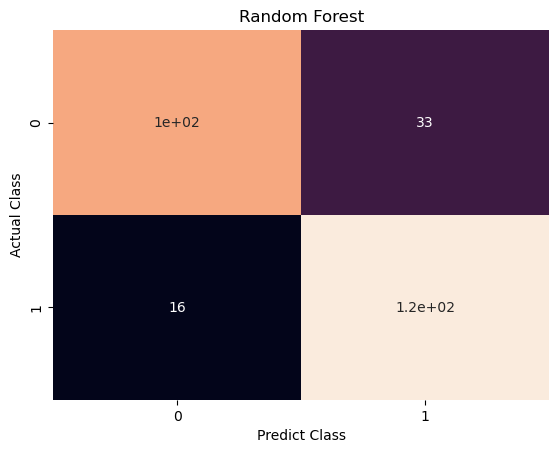

In [27]:
make_confusion_matrix("Random Forest", y_test, y_pred_rf)

In [28]:
import pickle

with open('SUPERVISED_LEARNING_RF.pkl', 'wb') as f:
    pickle.dump(xgbmodel, f)